# GRIP- THE SPARKS FOUNDATION

 Data science and business analytics internship<br>
 Task- Perform 'Exploratory Data Analysis' on dataset 'Global Terrorism'<br>
 Author- N.V.R.Samyuktha<br>
 Batch-july 2021<br>
 Data science and Business analytics intern at The Sparks Foundation<br>
 Dataset- https://bit.ly/2TK5Xn5 <br>
 Language used- Python 3<br>
 IDE used- Anaconda Jupyter Notebook


In [1]:
#import the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

 Reading the data from data source


In [2]:
#load the dataset
df= pd.read_csv('globalterrorismdb_0718dist 2.csv',encoding='ISO-8859-1')


In [3]:
df.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','nkill':'Killed','nwound':'Wounded','target1':'Target','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','summary':'Summary','gname':'Group','motive':'Motive'},inplace=True)


In [4]:
df = df[['Year','Month','Extended','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [5]:
df.head()

,Year,Month,Extended,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [6]:
df.isnull().sum()


Year                0
Month               0
Extended            0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Extended     181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   state        181270 non-null  object 
 6   Region       181691 non-null  object 
 7   city         181257 non-null  object 
 8   latitude     177135 non-null  float64
 9   longitude    177134 non-null  float64
 10  AttackType   181691 non-null  object 
 11  Killed       171378 non-null  float64
 12  Wounded      165380 non-null  float64
 13  Target       181055 non-null  object 
 14  Summary      115562 non-null  object 
 15  Group        181691 non-null  object 
 16  Target_type  181691 non-null  object 
 17  Weapon_type  181691 non-null  object 
 18  Motive       50561 non-n

In [8]:
df.describe()

,Year,Month,Extended,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,0.045346,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,0.208063,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,0.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,0.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,0.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,1.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [9]:
#destructive features
print("Country with the most attacks:",df['Country'].value_counts().idxmax())
print("City wiht the most attacks:",df['city'].value_counts().index[1]) #as first entry is unknown
print("Region with the most attacks:",df['Region'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Month with the most attacks:",df['Month'].value_counts().idxmax())
print("Group with the most attacks:",df['Group'].value_counts().index[1])
print("Most attack types:",df['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City wiht the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most attack types: Bombing/Explosion


Data Visualization

1.Number of Terrorist Activities Each Year

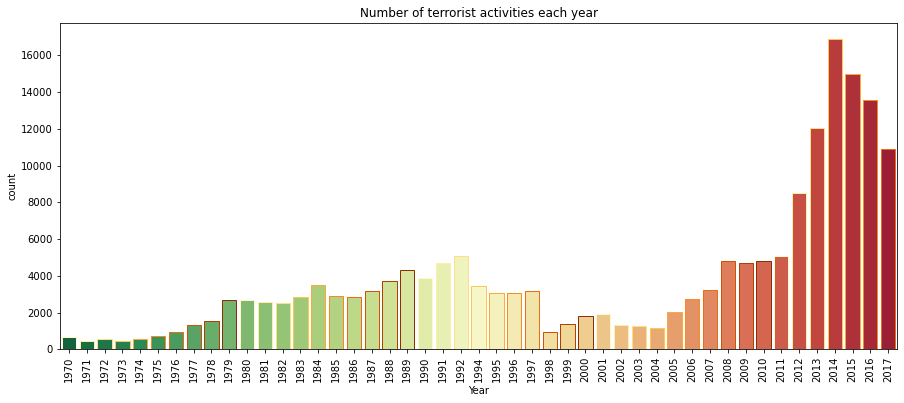

In [10]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr",10))
plt.xticks(rotation=90)
plt.title('Number of terrorist activities each year')
plt.show()

2.Number of terrorist activities by region in each year

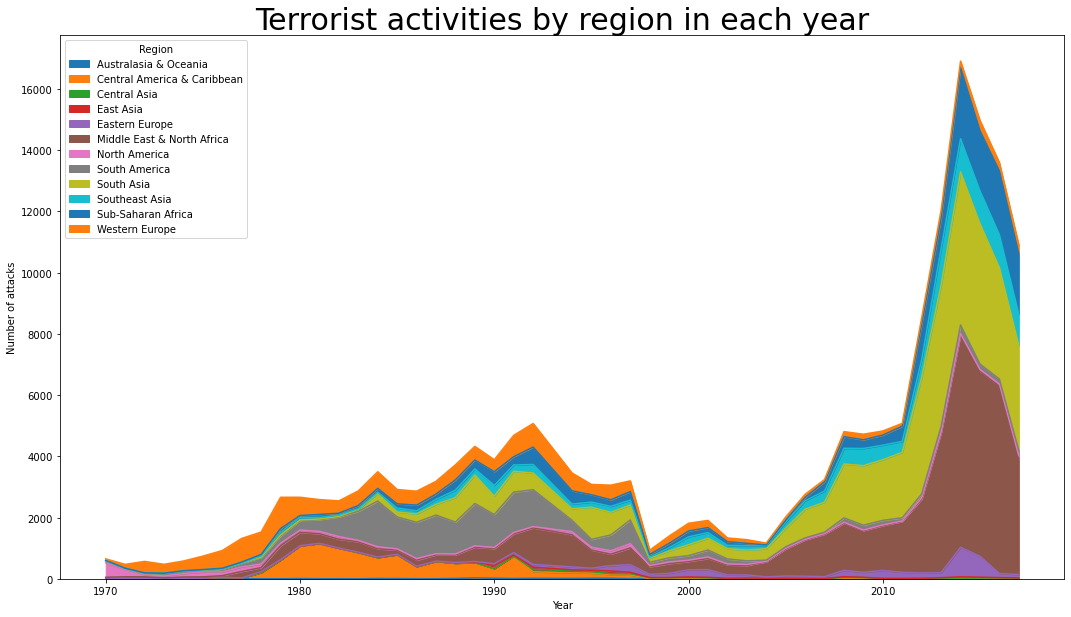

In [11]:
#Terrorist activities by region
pd.crosstab(df.Year,df.Region).plot(kind='area',figsize=(18,10))
plt.title('Terrorist activities by region in each year')
plt.title('Terrorist activities by region in each year',fontsize=30)
plt.ylabel('Number of attacks')
plt.show()

In [12]:
#History of the worst terror attack in heatmap 
df['Wounded'] =df['Wounded'].fillna(0).astype(int)
df['Killed'] =df['Killed'].fillna(0).astype(int)
df['casualities'] =df['Killed'] + df['Wounded']

In [13]:
#Values are sorted by the top 40 worst terror attacks
df1 = df.sort_values(by='casualities',ascending=False)[:40]


In [14]:
heat=df1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)


In [15]:
heat.head()


Year,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0
Ethiopia,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#Heat-Map
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go 
colorscale = [[0,'#F4F6F7'],[.3,'#A3E4D7'],[.6,'#A3E4D7'],[1,'#A3E4D7']]
heatmap= go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data= [heatmap]
layout= go.Layout(
    title='Top 40 worst terror attacks in history from 1982 to 2016',
    xaxis=dict(ticks='',nticks=20),
    yaxis=dict(ticks='')
)
fig= go.Figure(data=data,layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

In [17]:
df.Country.value_counts()[:15]


Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

3.Countries affected by terror activities

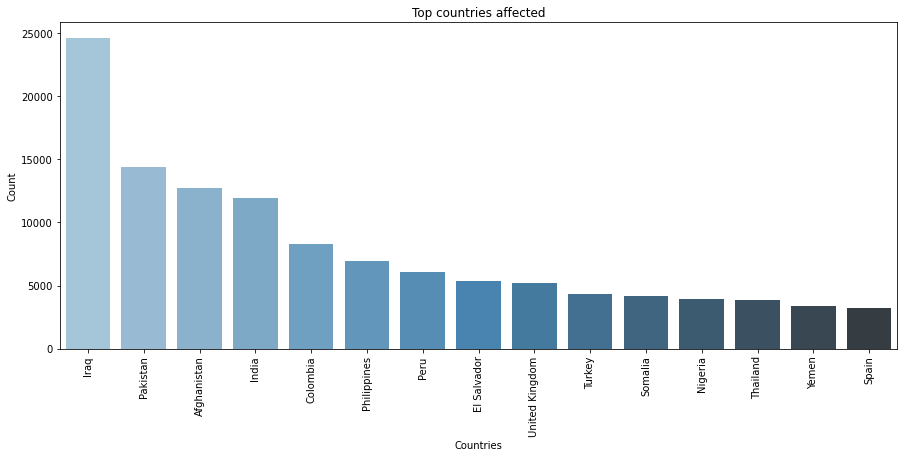

In [18]:
#Top countries affected by terror attacks
plt.subplots(figsize=(15,6))
sns.barplot(df['Country'].value_counts()[:15].index,df['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top countries affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

4.Number of deaths in each year

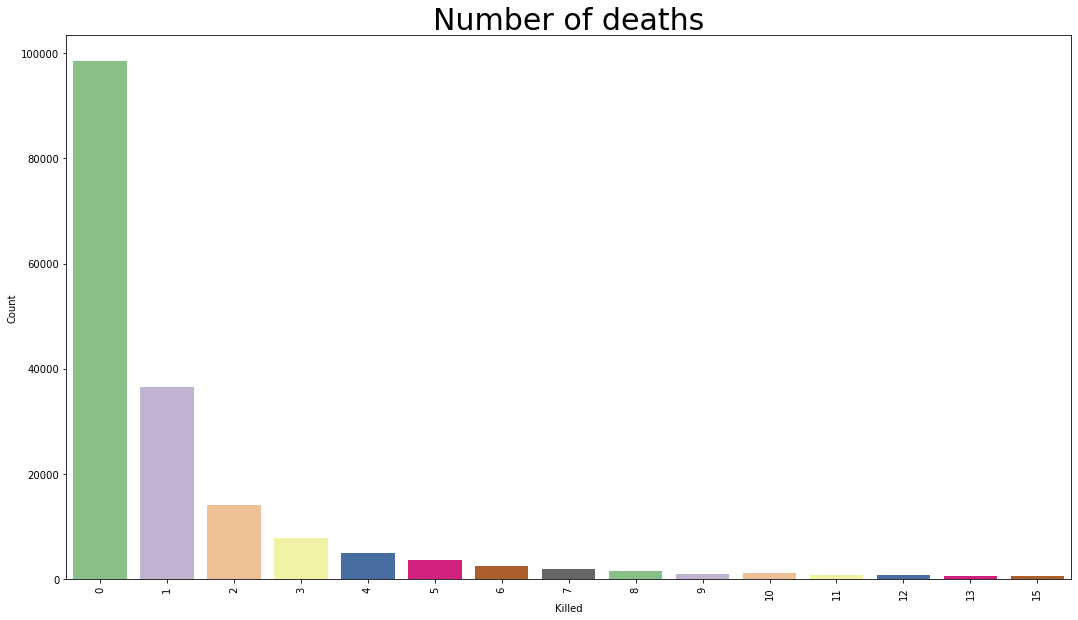

In [19]:
#Deaths
plt.subplots(figsize=(18,10))
sns.barplot(df['Killed'].value_counts()[:15].index,df['Killed'].value_counts()[:15].values,palette='Accent')
plt.title('Number of deaths')
plt.title('Number of deaths',fontsize=30)
plt.xlabel('Killed')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

5.Number of injuries in each year

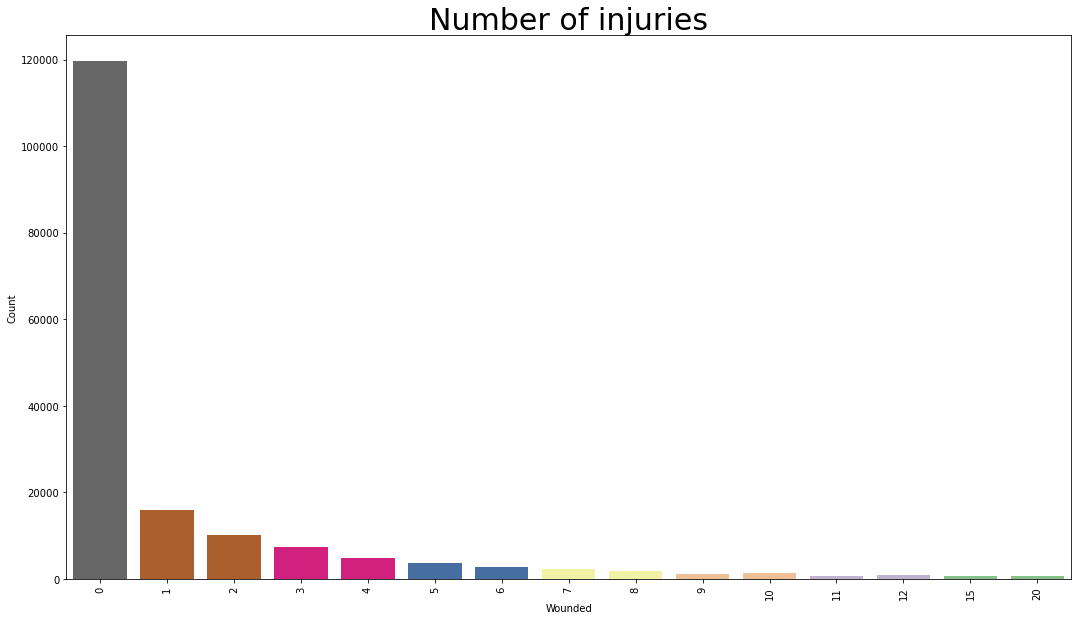

In [20]:
#Injuries
plt.subplots(figsize=(18,10))
sns.barplot(df['Wounded'].value_counts()[:15].index,df['Wounded'].value_counts()[:15].values,palette='Accent_r')
plt.title('Number of injuries')
plt.title('Number of injuries',fontsize=30)
plt.xlabel('Wounded')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [21]:
#Now to visualize the top four countries that have suffered the most using bubble charts in plotly
terror_df= df[(df['Group']!='Unknown')&(df['casualities']>50)]
terror_df.head()

,Year,Month,Extended,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
1200,1972,3,0,4,United Kingdom,Northern Ireland,Western Europe,Belfast,54.607712,-5.956210,Bombing/Explosion,2,130,"Janet Bereen, 21 and Anne Owens, 22, Catholics",NaN,Irish Republican Army (IRA),Business,Explosives,NaN,132
1314,1972,5,0,30,Israel,Central,Middle East & North Africa,Lod,32.004361,34.888229,Bombing/Explosion,26,72,Aircraft Terminal,NaN,Japanese Red Army (JRA),Airports & Aircraft,Firearms,NaN,98
1789,1973,3,0,8,United Kingdom,England,Western Europe,London,51.504387,-0.140041,Bombing/Explosion,1,238,Court Building,NaN,Irish Republican Army (IRA),Government (General),Explosives,NaN,239
1972,1973,8,0,5,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,5,55,TWA Lounge,NaN,Black September,Airports & Aircraft,Firearms,NaN,60
2138,1973,12,1,17,Italy,Lazio,Western Europe,Rome,41.890961,12.490069,Hostage Taking (Barricade Incident),30,50,Pan Am Lounge and Loading Pan Am 707,NaN,Black September,Airports & Aircraft,Firearms,NaN,80


In [22]:
terror_df= terror_df.sort_values(['Region','Country'])

In [23]:
#check for null values 
terror_df.isnull().sum()

Year              0
Month             0
Extended          0
Day               0
Country           0
state             3
Region            0
city              1
latitude         62
longitude        62
AttackType        0
Killed            0
Wounded           0
Target            9
Summary         517
Group             0
Target_type       0
Weapon_type       0
Motive         1059
casualities       0
dtype: int64

In [24]:
terror_df= terror_df.drop(['latitude','longitude','Summary','Motive','Target'],axis=1)

In [25]:
terror_df=terror_df.dropna(subset=['city'])

In [26]:
terror_df.isnull().sum()

Year           0
Month          0
Extended       0
Day            0
Country        0
state          3
Region         0
city           0
AttackType     0
Killed         0
Wounded        0
Group          0
Target_type    0
Weapon_type    0
casualities    0
dtype: int64

6.Methods of attack

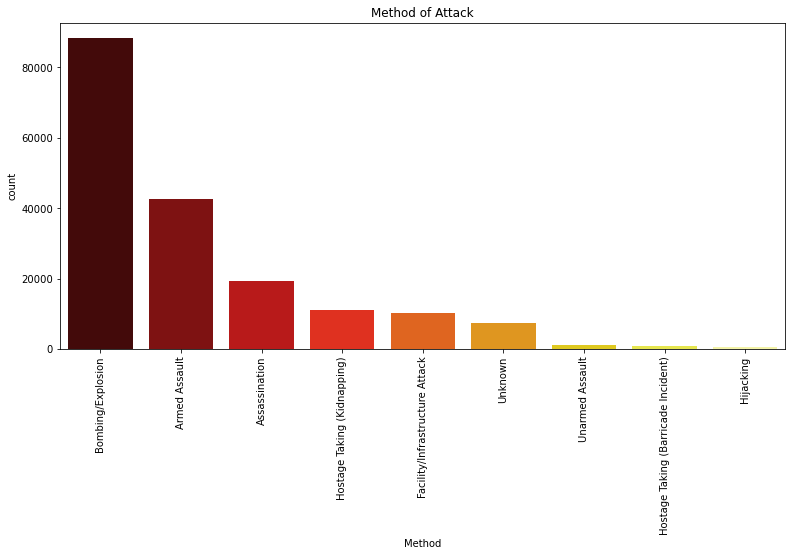

In [27]:
#Methods of attack
plt.figure(figsize=(13,6))
sns.countplot(df['AttackType'],data=df,order=df['AttackType'].value_counts().index,palette='hot')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('Method of Attack')
plt.show()

7.Terrorist attacks per region/country

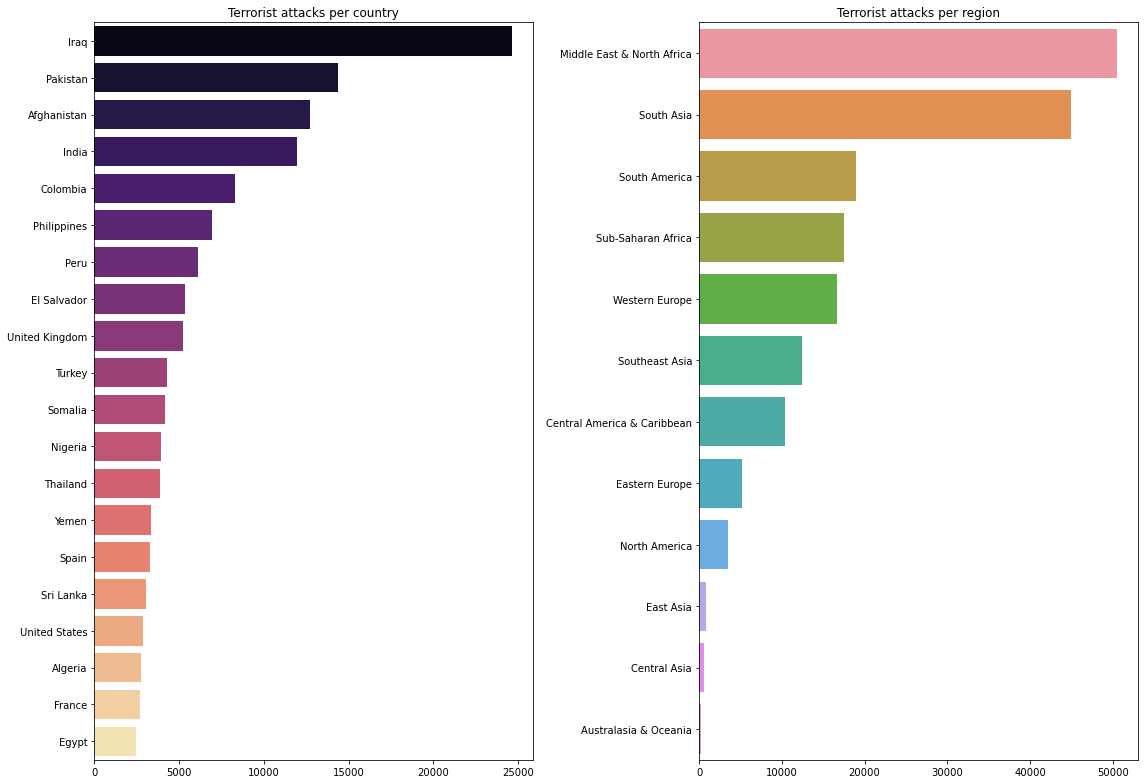

In [28]:
#Country and region
fig,axes= plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x=df['Country'].value_counts()[:20].values, y= df['Country'].value_counts()[:20].index,ax=axes[0],palette= 'magma');
axes[0].set_title('Terrorist attacks per country')
sns.barplot(x=df['Region'].value_counts().values,y=df['Region'].value_counts().index,ax=axes[1])
axes[1].set_title('Terrorist attacks per region')
fig.tight_layout()
plt.show()

8.Most active organizations

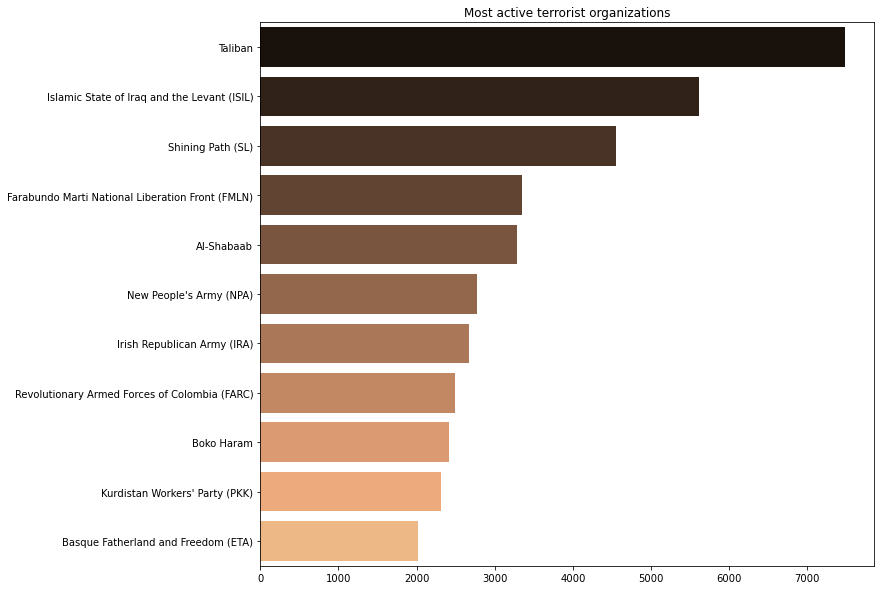

In [29]:
#most active organizations
plt.subplots(figsize=(11,10))
sns.barplot(y=df['Group'].value_counts()[1:12].index,x=df['Group'].value_counts()[1:12].values,
            palette='copper')
plt.title('Most active terrorist organizations')
plt.show()

9.Most affected targets

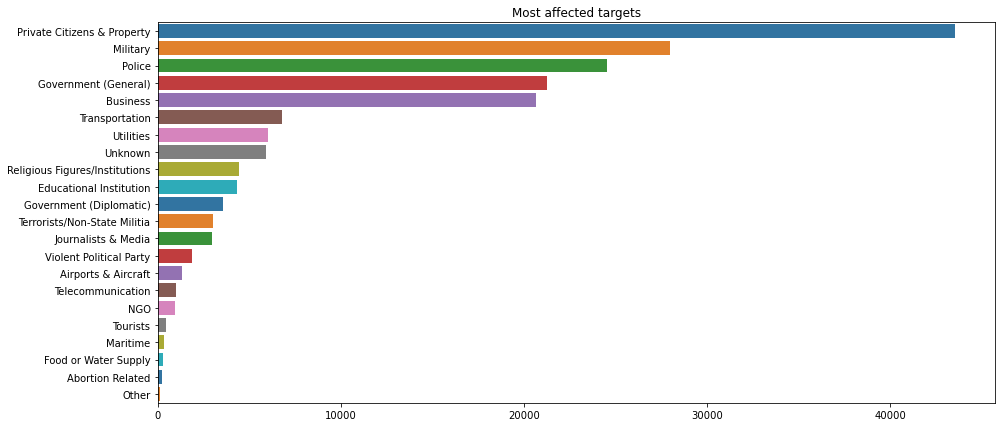

In [30]:
#Most affected targets
plt.subplots(figsize=(15,7))
sns.barplot(y=df['Target_type'].value_counts().index,x=df['Target_type'].value_counts().values,
            palette='tab10')
plt.title('Most affected targets')
plt.show()

10.Before and after the War on Terror

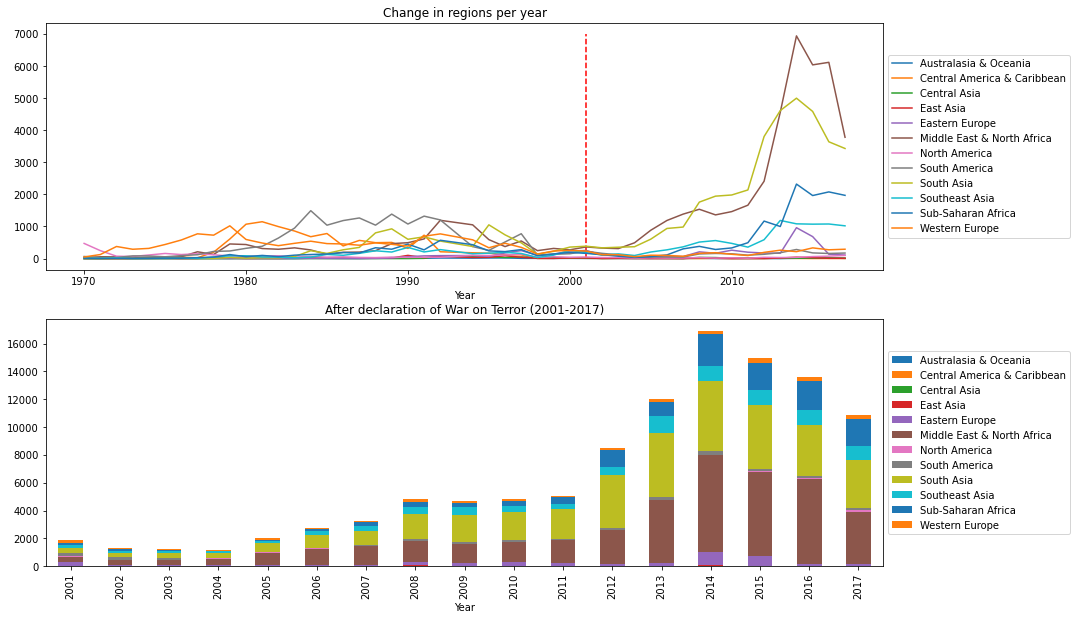

In [31]:
#After the 9/11 attacks in New York city, the US-Led War on Terror was launched with the goal to distinguish terrorism.
df_after=df[df['Year']>=2001]
fig,ax= plt.subplots(figsize=(15,10),nrows=2,ncols=1)
ax[0]= pd.crosstab(df.Year,df.Region).plot(ax=ax[0])
ax[0].set_title('Change in regions per year')
ax[0].legend(loc='center left',bbox_to_anchor= (1,0.5))
ax[0].vlines(x=2001,ymin=0,ymax=7000,colors='red',linestyles='--')
pd.crosstab(df_after.Year,df_after.Region).plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('After declaration of War on Terror (2001-2017)')
ax[1].legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.show()

From the first plot,it is very noticable that the terrorism landscape before and after the War on Terror is vastly different. Before 2001, the regions were much closer together in terms of activity, eventually all dropping to a minimum in 2000. After 2001, the Middle East and South Asia have dictated the rise in terrorism numbers, with a significant increase in Sub-Saharan Africa as well.

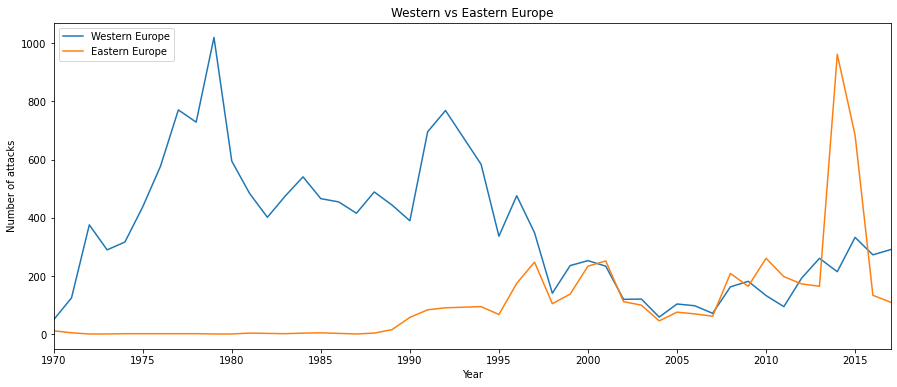

In [32]:
#The shift from Western Europe to Eastern Europe
fig,axes= plt.subplots(figsize=(15,6))
sns.lineplot(df[df['Region']=='Western Europe']['Year'].value_counts().index,
            df[df['Region']=='Western Europe']['Year'].value_counts().values)
sns.lineplot(df[df['Region']=='Eastern Europe']['Year'].value_counts().index,
            df[df['Region']=='Eastern Europe']['Year'].value_counts().values)
plt.xlabel('Year')
plt.xticks(np.arange(1970,2017,5))
plt.xlim(1970,2017)
plt.ylabel('Number of attacks')
plt.title('Western vs Eastern Europe')
axes.legend(labels=['Western Europe','Eastern Europe'])
plt.show()

Though Western Europe has seen considerably more terrorism in the past, there is now a shift in acitivity towards the east. The year 1991 seems to be a turning point here considering the dissolution of the Soviet Union at the time and the numerous accounts of unrest that followed.The spike at 2014 can be attributed to the recent Ukranian revolution and related Ukranian-Russian conflicts such as the war in Donbass.The following plots show the number of Russia and Ukraine's terrorist events compared to the rest of Eastern Europe.

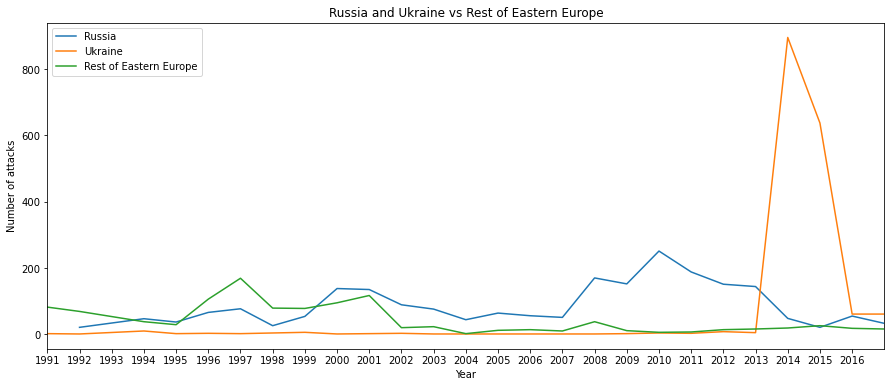

In [33]:
fig,ax= plt.subplots(figsize=(15,6))
russia= df[(df['Country']=='Russia')&(df['Year'].between(1991,2017,inclusive=True))]['Year'].value_counts()
ukraine= df[(df['Country']=='Ukraine')&(df['Year'].between(1991,2017,inclusive=True))]['Year'].value_counts()
rest_east= df[(df['Country']!='Russia')&(df['Country']!='Ukraine')
              &(df['Region']=='Eastern Europe')&(df['Year'].between(1991,2017,inclusive=True))]['Year'].value_counts()
sns.lineplot(x=russia.index,y=russia.values)
sns.lineplot(x=ukraine.index,y=ukraine.values)
sns.lineplot(x=rest_east.index,y=rest_east.values)
plt.xticks(np.arange(1991,2017,1))
plt.xlim(1991,2017)
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('Russia and Ukraine vs Rest of Eastern Europe')
ax.legend(labels=['Russia','Ukraine','Rest of Eastern Europe'])
plt.show()

Clearly, Russia and Ukraine are the main contributors to this shift.Ukraine's isolated spike in 2014 shown here is nearly identical to the previous plot. A large majority of Eastern European terrorism in the past couple years has been found in Ukraine.

10.Are extended attacks more lethal?

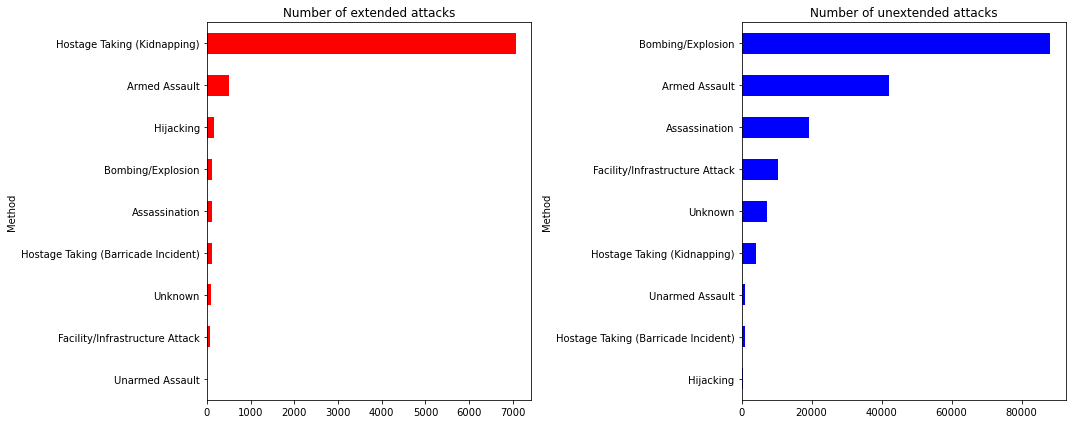

In [34]:
fig,ax= plt.subplots(figsize=(15,6),nrows=1,ncols=2)
ax[0]=df[df['Extended']==1].groupby('AttackType').count()['Extended'].sort_values().plot.barh(color='red',ax=ax[0])
ax[1]=df[df['Extended']==0].groupby('AttackType').count()['Extended'].sort_values().plot.barh(color='blue',ax=ax[1])
ax[0].set_title('Number of extended attacks')
ax[0].set_ylabel('Method')
ax[1].set_title('Number of unextended attacks')
ax[1].set_ylabel('Method')
plt.tight_layout()
plt.show()

Extended attacks overwhelmingly consist of hostage taking. On the other hand, unextended attacks seem to be a bit more spread between bombings/explosions, armed assaults and assassinations.

THANK YOU